# Importação de bibliotecas

In [69]:
!pip install feature_engine

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, tree, linear_model, metrics, pipeline
from feature_engine import encoding, discretisation

# Importação de dados

In [71]:
url = 'https://raw.githubusercontent.com/hackathon-ficaAi/churnInsight/refs/heads/main/churn_bancos/data/churn_bancos.csv'
df = pd.read_csv(url)
df.head()

,numero_linha,id_cliente,sobrenome,score_credito,pais,genero,idade,tempo_relacionamento,saldo,num_produtos,possui_cartao_credito,membro_ativo,salario_estimado,churned,reclamou,score_satisfacao,tipo_cartao,pontos_acumulados
0,1,15634602,Hargrave,619,frança,feminino,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,espanha,feminino,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,frança,feminino,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,frança,feminino,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,espanha,feminino,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Amostra (Sample)
Selecionando o que é feature e nossa variável alvo e separando em amostras de treino e teste.

In [72]:
# Variável alvo
target = 'churned'

# Variáveis
cols = df.columns[3:]
features = [col for col in cols if col not in [target]]
features

X,y = df[features], df[target]

In [73]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,
                                                                    random_state=42,
                                                                    test_size=0.25,
                                                                    stratify=y)

In [74]:
print("Taxa variável resposta:",y.mean())
print("Taxa variável resposta Treino:",y_train.mean())
print("Taxa variável resposta Teste:",y_test.mean())

Taxa variável resposta: 0.2038
Taxa variável resposta Treino: 0.20386666666666667
Taxa variável resposta Teste: 0.2036


# Exploração dos dados (Explore)
Fazendo uma exploração básica com objetivo de observar quais variáveis podem nos trazer mais informações em relação a possibilidade de churn do cliente

In [75]:
X_train.isna().sum().sort_values(ascending=False)

# Análise bivariada
df_analise = X_train.copy()
df_analise[target] = y_train
df_analise

feat_num = X_train.select_dtypes(['number']).columns

sumario = df_analise.groupby(by=target)[feat_num].agg(["mean","median"]).T
sumario

churned                                  0              1
score_credito         mean      652.095964     643.939176
                      median    654.000000     645.000000
idade                 mean       37.526712      44.692610
                      median     36.000000      44.000000
tempo_relacionamento  mean        5.016413       5.054284
                      median      5.000000       5.000000
saldo                 mean    72591.000646   91492.598666
                      median  91562.990000  109958.150000
num_produtos          mean        1.546307       1.476128
                      median      2.000000       1.000000
possui_cartao_credito mean        0.710099       0.696534
                      median      1.000000       1.000000
membro_ativo          mean        0.555016       0.366906
                      median      1.000000       0.000000
salario_estimado      mean    98855.878699  102195.482806
                      median  97684.460000  104016.610000
reclamou              mean        0.001340       0.998692
                      median      0.000000       1.000000
score_satisfacao      mean        3.019260       2.983649
                      median      3.000000       3.000000
pontos_acumulados     mean      606.829342     599.726619
                      median    603.000000     600.000000

In [76]:
sumario['diff_abs'] = sumario[0] - sumario[1]
sumario['diff_rel'] = sumario[0] / sumario[1]
sumario.sort_values(by=['diff_rel'], ascending=False)

churned                                  0              1      diff_abs  \
membro_ativo          median      1.000000       0.000000      1.000000   
num_produtos          median      2.000000       1.000000      1.000000   
membro_ativo          mean        0.555016       0.366906      0.188109   
num_produtos          mean        1.546307       1.476128      0.070179   
possui_cartao_credito mean        0.710099       0.696534      0.013565   
score_credito         median    654.000000     645.000000      9.000000   
                      mean      652.095964     643.939176      8.156788   
score_satisfacao      mean        3.019260       2.983649      0.035610   
pontos_acumulados     mean      606.829342     599.726619      7.102723   
                      median    603.000000     600.000000      3.000000   
possui_cartao_credito median      1.000000       1.000000      0.000000   
score_satisfacao      median      3.000000       3.000000      0.000000   
tempo_relacionamento  median      5.000000       5.000000      0.000000   
                      mean        5.016413       5.054284     -0.037871   
salario_estimado      mean    98855.878699  102195.482806  -3339.604107   
                      median  97684.460000  104016.610000  -6332.150000   
idade                 mean       37.526712      44.692610     -7.165897   
saldo                 median  91562.990000  109958.150000 -18395.160000   
idade                 median     36.000000      44.000000     -8.000000   
saldo                 mean    72591.000646   91492.598666 -18901.598019   
reclamou              mean        0.001340       0.998692     -0.997352   
                      median      0.000000       1.000000     -1.000000   

churned                       diff_rel  
membro_ativo          median       inf  
num_produtos          median  2.000000  
membro_ativo          mean    1.512690  
num_produtos          mean    1.047543  
possui_cartao_credito mean    1.019475  
score_credito         median  1.013953  
                      mean    1.012667  
score_satisfacao      mean    1.011935  
pontos_acumulados     mean    1.011843  
                      median  1.005000  
possui_cartao_credito median  1.000000  
score_satisfacao      median  1.000000  
tempo_relacionamento  median  1.000000  
                      mean    0.992507  
salario_estimado      mean    0.967321  
                      median  0.939124  
idade                 mean    0.839663  
saldo                 median  0.832708  
idade                 median  0.818182  
saldo                 mean    0.793408  
reclamou              mean    0.001342  
                      median  0.000000

A partir desses dados, conseguimos observar que algumas variáveis se destacam, como por exemplo, membros_ativos tem uma chance muito menor de dar churn, assim como membros que consomem mais de um produto oferecido pelo banco.

Por outro lado, clientes com saldos maiores, com mais reclamações ou de mais idade tendem a dar churn no banco, sendo pontos importantes a se observar.

Além disso, vemos também que tempo de relacionamento, score de satisfação com o serviço e possuir ou não cartões de crédito tem pouco a dizer sobre o comportamento de churn do cliente.

[Text(0.41810344827586204, 0.95, 'reclamou <= 0.5\ngini = 0.325\nsamples = 7500\nvalue = [5971, 1529]\nclass = 0'),
 Text(0.13793103448275862, 0.85, 'pontos_acumulados <= 191.0\ngini = 0.001\nsamples = 5965\nvalue = [5963, 2]\nclass = 0'),
 Text(0.27801724137931033, 0.8999999999999999, 'True  '),
 Text(0.06896551724137931, 0.75, 'salario_estimado <= 15679.325\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.034482758620689655, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.10344827586206896, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.20689655172413793, 0.75, 'salario_estimado <= 191604.32\ngini = 0.0\nsamples = 5963\nvalue = [5962, 1]\nclass = 0'),
 Text(0.1724137931034483, 0.65, 'gini = 0.0\nsamples = 5722\nvalue = [5722, 0]\nclass = 0'),
 Text(0.2413793103448276, 0.65, 'salario_estimado <= 191739.625\ngini = 0.008\nsamples = 241\nvalue = [240, 1]\nclass = 0'),
 Text(0.20689655172413793, 0.55, 'gini = 0.0\nsamples = 1\nvalu

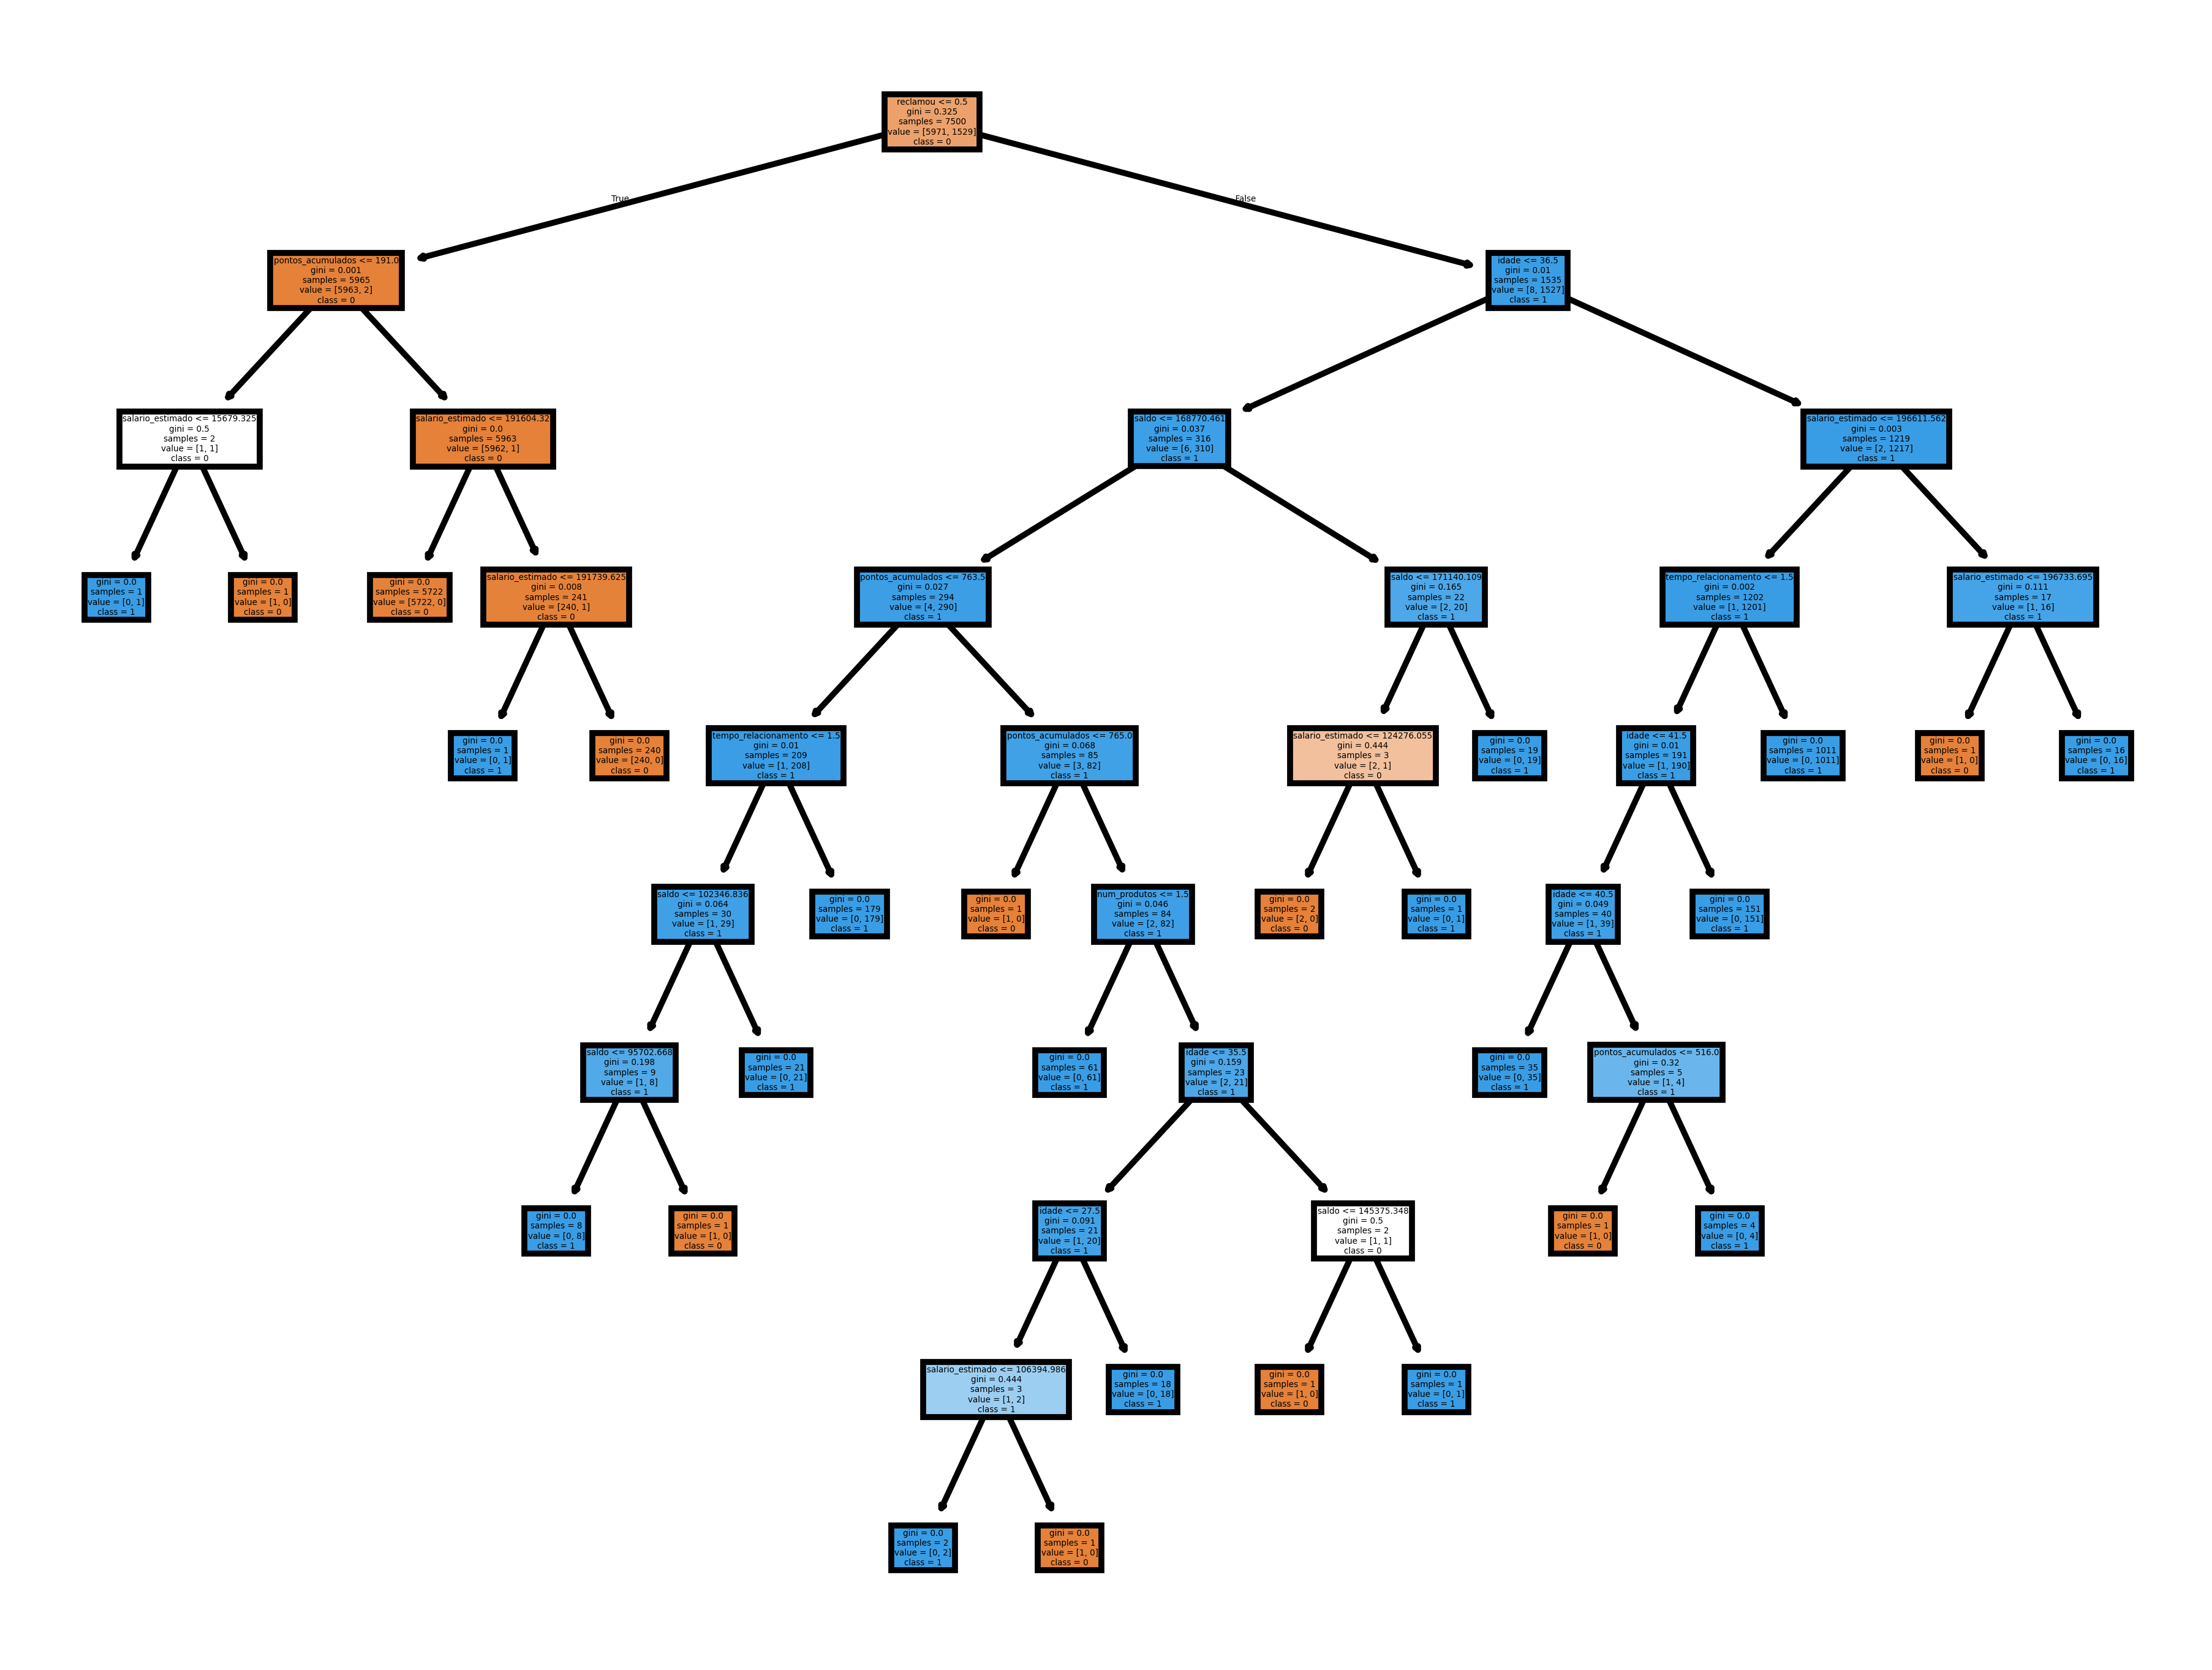

In [77]:
arvore = tree.DecisionTreeClassifier(random_state=42)
arvore.fit(X_train[feat_num],y_train)

plt.figure(dpi=700)
tree.plot_tree(arvore, feature_names=X_train[feat_num].columns,
               filled=True,
               class_names= [str(i) for i in arvore.classes_])

In [78]:
pd.Series(arvore.feature_importances_, index=X_train[feat_num].columns).sort_values(ascending=False)

,0
reclamou,0.991820
salario_estimado,0.003147
saldo,0.002251
pontos_acumulados,0.001887
idade,0.000764
num_produtos,0.000104
tempo_relacionamento,0.000027
score_credito,0.000000
possui_cartao_credito,0.000000
membro_ativo,0.000000


In [79]:
pd.crosstab(df['reclamou'], df['churned'], normalize='index')

churned,0,1
reclamou,,
0,0.999497,0.000503
1,0.004892,0.995108


In [80]:
churn_silencioso = df[(df['churned'] == 1) & (df['reclamou'] == 0)]
df.groupby(['reclamou', 'churned'])[feat_num].mean()


score_credito      idade  tempo_relacionamento  \
reclamou churned                                                   
0        0           651.841927  37.411217              5.032319   
         1           675.500000  44.250000              4.250000   
1        0           648.600000  34.900000              5.400000   
         1           645.355457  44.836775              4.936087   

                          saldo  num_produtos  possui_cartao_credito  \
reclamou churned                                                       
0        0         72694.777464      1.544014               0.706992   
         1        119920.525000      1.250000               1.000000   
1        0        110891.039000      1.700000               0.800000   
         1         91052.817109      1.475910               0.698623   

                  membro_ativo  salario_estimado  reclamou  score_satisfacao  \
reclamou churned                                                               
0        0            0.554577      99726.161686       0.0          3.017606   
         1            0.000000      99520.432500       0.0          2.250000   
1        0            0.600000     100276.698000       1.0          3.300000   
         1            0.361357     101513.821224       1.0          2.999017   

                  pontos_acumulados  
reclamou churned                     
0        0               606.933727  
         1               433.250000  
1        0               694.800000  
         1               604.785152

Pela árvore de decisão, temos que a variável "reclamou" tem uma importância muito grande, isso tem muito haver com o fato de ela ter uma alta correlação com a variável alvo.

No caso do nosso dataset, ela funciona basicamente como um "espelho" da variável alvo, portanto, apesar de termos alguns clientes que dão churn sem fazer nenhuma reclamação, podemos dizer que se o cliente fizer reclamação então ele vai dar churn.

Como queremos previnir o churn e não apenas saber se ele ocorreu/ocorrerá, uma alternativa seria não utilizar a variável "reclamou", ou usarmos ela como a nossa target.


In [81]:
# Removendo a coluna "reclamou"
X_train.drop(columns=['reclamou'], inplace=True)

In [82]:
# Refazendo as Análises
df_analise = X_train.copy()
df_analise[target] = y_train
df_analise

feat_num = X_train.select_dtypes(['number']).columns

sumario = df_analise.groupby(by=target)[feat_num].agg(["mean","median"]).T
sumario

churned                                  0              1
score_credito         mean      652.095964     643.939176
                      median    654.000000     645.000000
idade                 mean       37.526712      44.692610
                      median     36.000000      44.000000
tempo_relacionamento  mean        5.016413       5.054284
                      median      5.000000       5.000000
saldo                 mean    72591.000646   91492.598666
                      median  91562.990000  109958.150000
num_produtos          mean        1.546307       1.476128
                      median      2.000000       1.000000
possui_cartao_credito mean        0.710099       0.696534
                      median      1.000000       1.000000
membro_ativo          mean        0.555016       0.366906
                      median      1.000000       0.000000
salario_estimado      mean    98855.878699  102195.482806
                      median  97684.460000  104016.610000
score_satisfacao      mean        3.019260       2.983649
                      median      3.000000       3.000000
pontos_acumulados     mean      606.829342     599.726619
                      median    603.000000     600.000000

In [83]:
sumario['diff_abs'] = sumario[0] - sumario[1]
sumario['diff_rel'] = sumario[0] / sumario[1]
sumario.sort_values(by=['diff_rel'], ascending=False)

churned                                  0              1      diff_abs  \
membro_ativo          median      1.000000       0.000000      1.000000   
num_produtos          median      2.000000       1.000000      1.000000   
membro_ativo          mean        0.555016       0.366906      0.188109   
num_produtos          mean        1.546307       1.476128      0.070179   
possui_cartao_credito mean        0.710099       0.696534      0.013565   
score_credito         median    654.000000     645.000000      9.000000   
                      mean      652.095964     643.939176      8.156788   
score_satisfacao      mean        3.019260       2.983649      0.035610   
pontos_acumulados     mean      606.829342     599.726619      7.102723   
                      median    603.000000     600.000000      3.000000   
tempo_relacionamento  median      5.000000       5.000000      0.000000   
score_satisfacao      median      3.000000       3.000000      0.000000   
possui_cartao_credito median      1.000000       1.000000      0.000000   
tempo_relacionamento  mean        5.016413       5.054284     -0.037871   
salario_estimado      mean    98855.878699  102195.482806  -3339.604107   
                      median  97684.460000  104016.610000  -6332.150000   
idade                 mean       37.526712      44.692610     -7.165897   
saldo                 median  91562.990000  109958.150000 -18395.160000   
idade                 median     36.000000      44.000000     -8.000000   
saldo                 mean    72591.000646   91492.598666 -18901.598019   

churned                       diff_rel  
membro_ativo          median       inf  
num_produtos          median  2.000000  
membro_ativo          mean    1.512690  
num_produtos          mean    1.047543  
possui_cartao_credito mean    1.019475  
score_credito         median  1.013953  
                      mean    1.012667  
score_satisfacao      mean    1.011935  
pontos_acumulados     mean    1.011843  
                      median  1.005000  
tempo_relacionamento  median  1.000000  
score_satisfacao      median  1.000000  
possui_cartao_credito median  1.000000  
tempo_relacionamento  mean    0.992507  
salario_estimado      mean    0.967321  
                      median  0.939124  
idade                 mean    0.839663  
saldo                 median  0.832708  
idade                 median  0.818182  
saldo                 mean    0.793408

[Text(0.5306122448979592, 0.9166666666666666, 'idade <= 42.5\ngini = 0.325\nsamples = 7500\nvalue = [5971, 1529]\nclass = 0'),
 Text(0.29591836734693877, 0.75, 'num_produtos <= 2.5\ngini = 0.213\nsamples = 5355\nvalue = [4707, 648]\nclass = 0'),
 Text(0.413265306122449, 0.8333333333333333, 'True  '),
 Text(0.16326530612244897, 0.5833333333333334, 'num_produtos <= 1.5\ngini = 0.189\nsamples = 5224\nvalue = [4673, 551]\nclass = 0'),
 Text(0.08163265306122448, 0.4166666666666667, 'idade <= 38.5\ngini = 0.282\nsamples = 2580\nvalue = [2142, 438]\nclass = 0'),
 Text(0.04081632653061224, 0.25, 'membro_ativo <= 0.5\ngini = 0.24\nsamples = 1968\nvalue = [1694, 274]\nclass = 0'),
 Text(0.02040816326530612, 0.08333333333333333, 'gini = 0.294\nsamples = 961\nvalue = [789, 172]\nclass = 0'),
 Text(0.061224489795918366, 0.08333333333333333, 'gini = 0.182\nsamples = 1007\nvalue = [905, 102]\nclass = 0'),
 Text(0.12244897959183673, 0.25, 'membro_ativo <= 0.5\ngini = 0.392\nsamples = 612\nvalue = [448

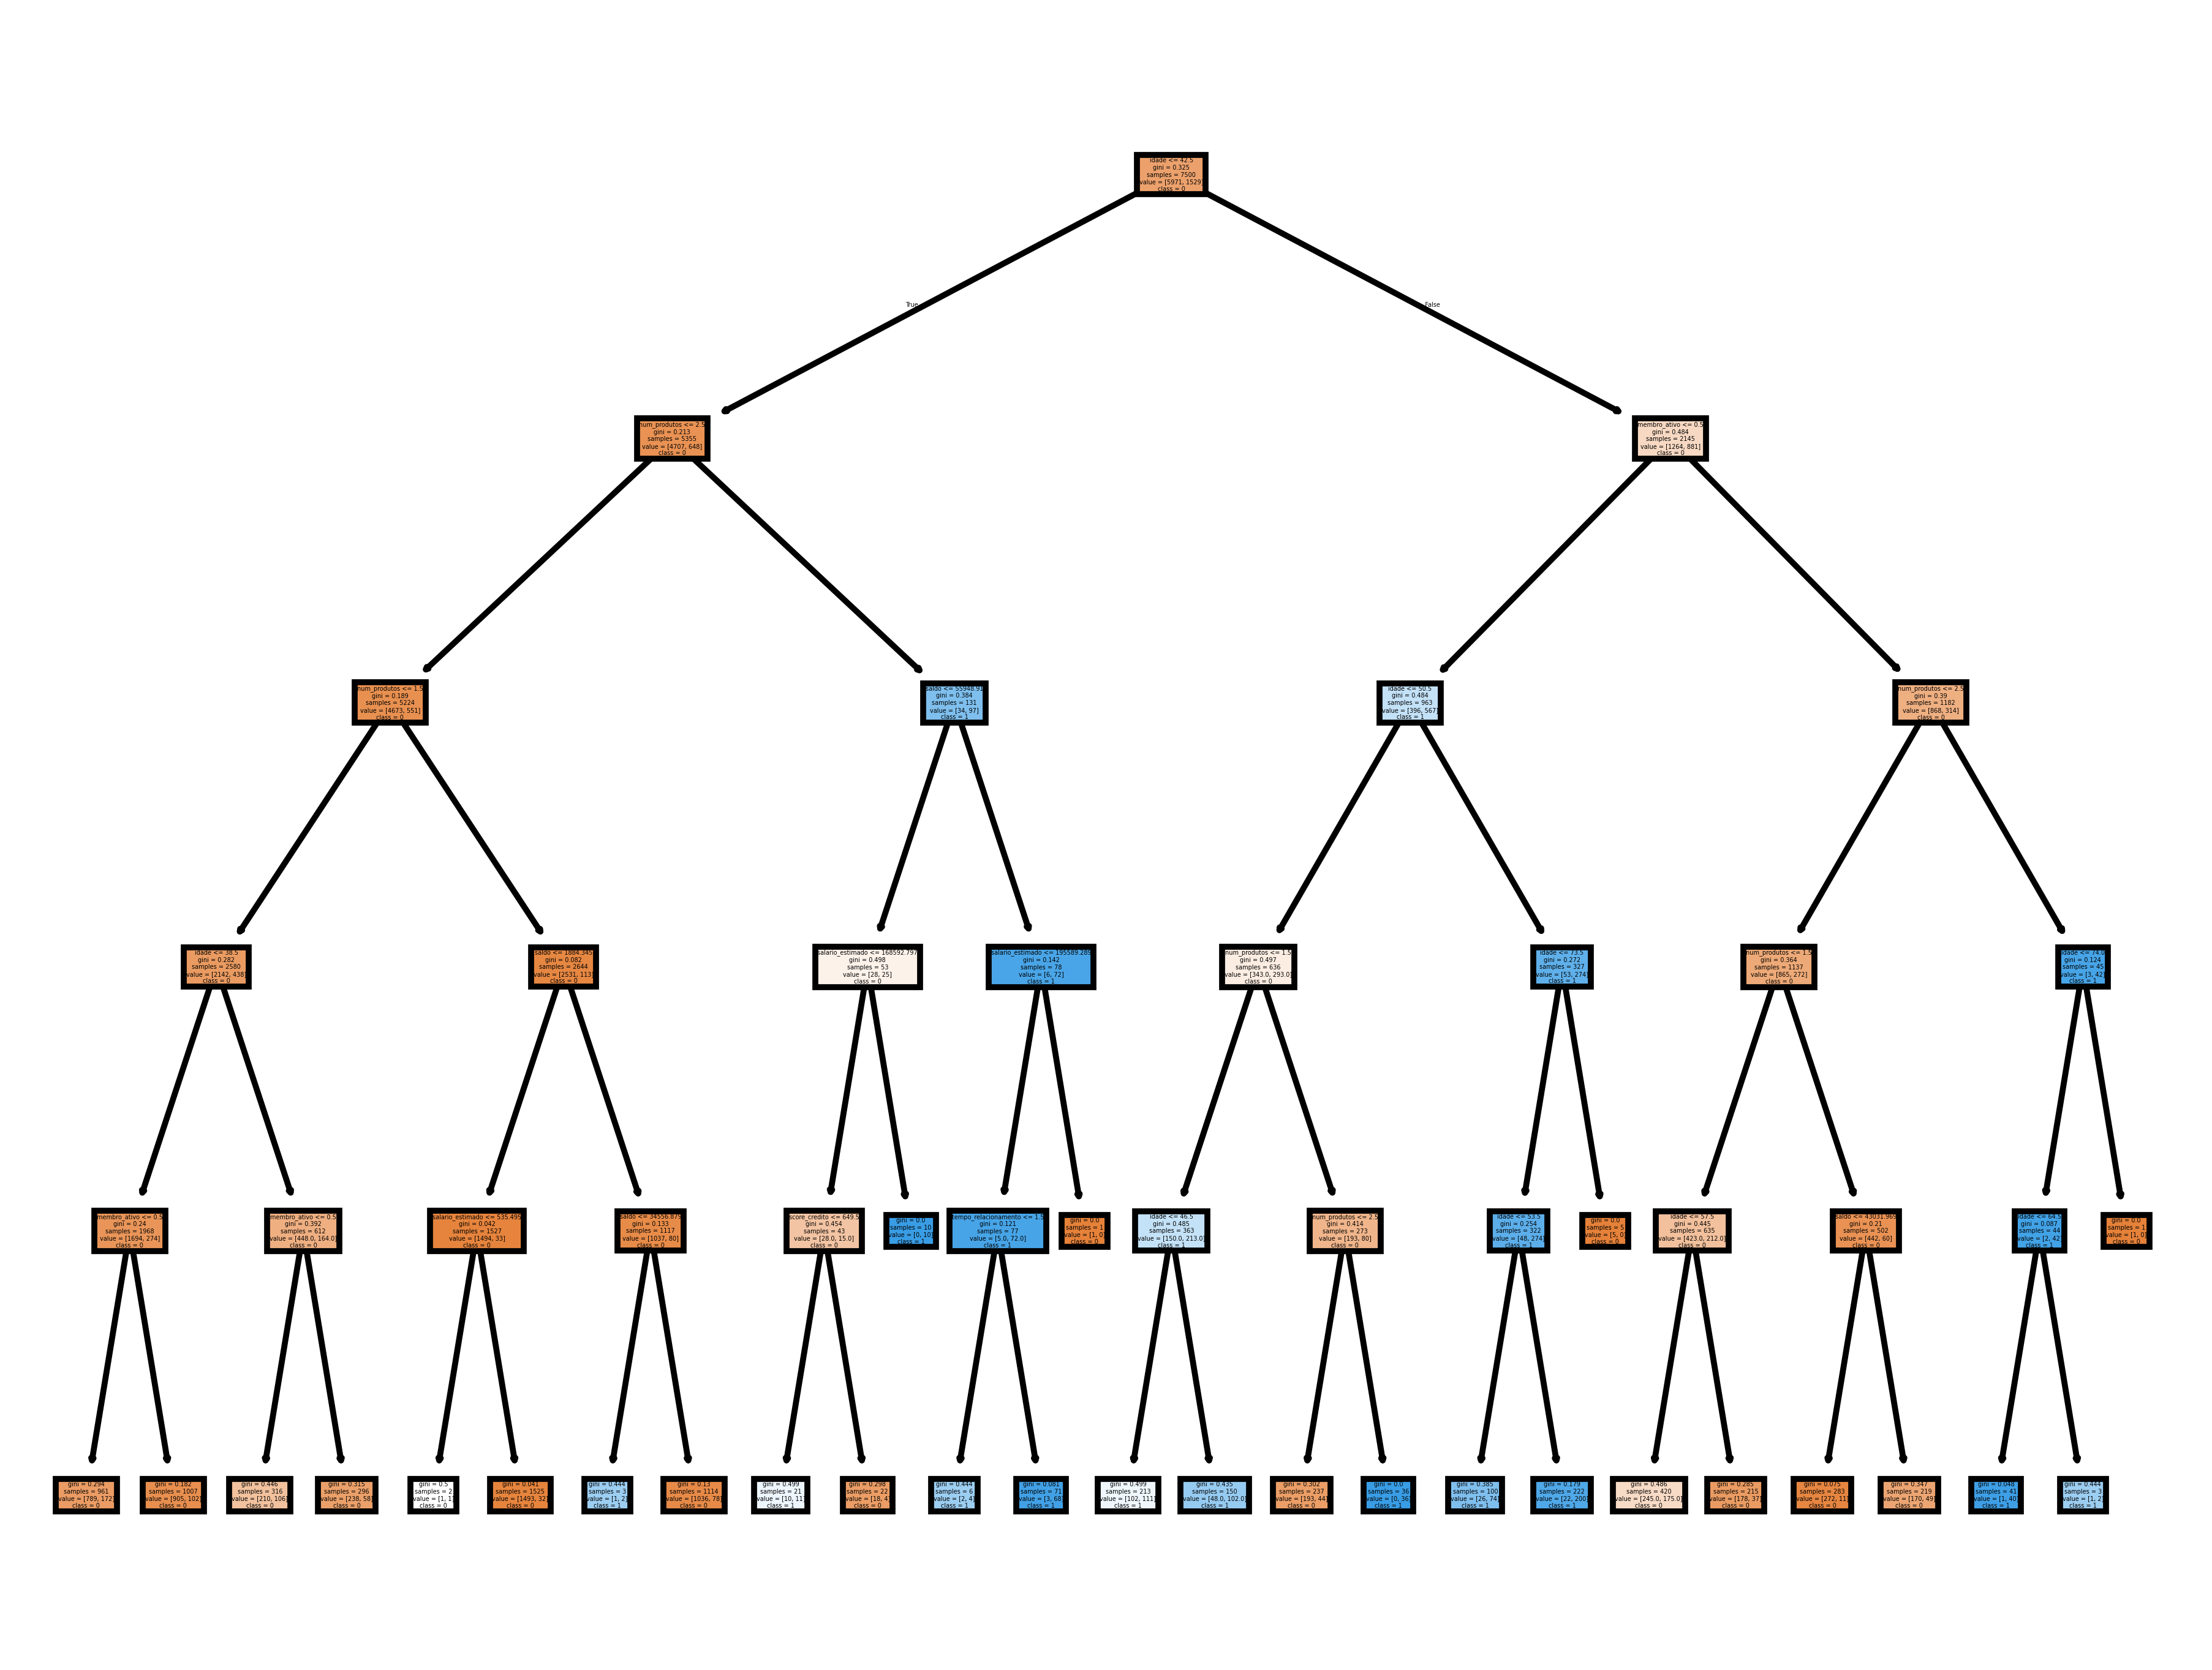

In [84]:
arvore = tree.DecisionTreeClassifier(random_state=42, max_depth=5)
arvore.fit(X_train[feat_num],y_train)

plt.figure(dpi=700)
tree.plot_tree(arvore, feature_names=X_train[feat_num].columns,
               filled=True,
               class_names= [str(i) for i in arvore.classes_])

In [85]:
feature_importances = (pd.Series(arvore.feature_importances_, index=X_train[feat_num].columns)
                       .sort_values(ascending=False)
                       .reset_index())
feature_importances['acumulada'] = feature_importances[0].cumsum()
feature_importances

,index,0,acumulada
0,idade,0.453913,0.453913
1,num_produtos,0.346133,0.800046
2,membro_ativo,0.151140,0.951186
3,saldo,0.032833,0.984019
4,salario_estimado,0.011730,0.995749
5,score_credito,0.003096,0.998845
6,tempo_relacionamento,0.001155,1.000000
7,possui_cartao_credito,0.000000,1.000000
8,score_satisfacao,0.000000,1.000000
9,pontos_acumulados,0.000000,1.000000


Agora podemos ver por exemplo que idade, número de produtos utilizados pelo cliente, se o consumidor é ativo ou não, saldo e salário estimado também são features que possuem grande importância para prever o churn do cliente.

In [86]:
feat_cat = X_train.select_dtypes(["object"]).columns

df_analise_cat = X_train[feat_cat].copy()
df_analise_cat[target] = y_train

def resumo_categorica(var,df=df_analise_cat, target=target):
    tabela = pd.crosstab(df[var], df[target], normalize='columns')

    resumo = tabela.copy()

    resumo['diff_abs'] = resumo[0] - resumo[1]
    resumo['diff_rel'] = resumo[0] / resumo[1]

    return resumo

In [87]:
resumo_categorica('pais')

churned,0,1,diff_abs,diff_rel
pais,,,,
alemanha,0.210183,0.403532,-0.193349,0.520858
espanha,0.263775,0.201439,0.062336,1.309454
frança,0.526043,0.395029,0.131013,1.331654


Observando as variáveis categóricas, podemos notar que a maior taxa de retenção se encontra na França, tendo 52,6% em relação ao total de pessoas que não dão churn nos 3 países. Além disso vemos que existe uma taxa muito alta de churn na Alemanha, onde temos uma diferença relativa de 52% de churn em relação a não churn.

In [88]:
resumo_categorica('genero')

churned,0,1,diff_abs,diff_rel
genero,,,,
feminino,0.422375,0.553303,-0.130928,0.763370
masculino,0.577625,0.446697,0.130928,1.293102


Na questão do genêro, vemos que mulheres costumam dar muito mais churn do que homens, tendo uma relação inversamente proporcional.

In [89]:
resumo_categorica('tipo_cartao')

churned,0,1,diff_abs,diff_rel
tipo_cartao,,,,
DIAMOND,0.243678,0.268149,-0.024471,0.908740
GOLD,0.256908,0.242642,0.014266,1.058795
PLATINUM,0.251047,0.241988,0.009058,1.037434
SILVER,0.248367,0.247220,0.001147,1.004638


Já em relação ao tipo de cartão, vemos que clientes com cartão Diamond possui uma taxa maior de churn, mostrando que pessoas com poder de requisição maior se mostram mais insatisfeitos com os serviços e benefícios recebidos.

In [90]:
from scipy.stats import chi2_contingency

def resumo_categorica_global(var, df=df_analise_cat, target=target):
    # Crosstab absoluta (para chi²)
    tabela_abs = pd.crosstab(df[var], df[target])

    # Crosstab relativa (para diff)
    tabela_rel = pd.crosstab(df[var], df[target], normalize='columns')

    diff_abs = (tabela_rel[0] - tabela_rel[1]).abs().max()
    diff_rel = (tabela_rel[0] / tabela_rel[1]).apply(lambda x: max(x, 1/x)).max()

    chi2, p, _, _ = chi2_contingency(tabela_abs)

    return pd.Series({
        'max_diff_abs': diff_abs,
        'max_diff_rel': diff_rel,
        'chi2': chi2,
        'p_value': p
    })

In [91]:
resumo_final = (
    pd.DataFrame(
        {var: resumo_categorica_global(var) for var in feat_cat}
    )
    .T
    .sort_values('chi2', ascending=False)
)

In [92]:
resumo_final

,max_diff_abs,max_diff_rel,chi2,p_value
pais,0.193349,1.919911,243.003590,1.707815e-53
genero,0.130928,1.309981,83.814520,5.434419e-20
tipo_cartao,0.024471,1.100425,4.314165,2.294775e-01


Olhando para o contexto estatístico, temos que o qui-quadrado de país e genêro são muito altos, indicando que existe uma forte associação com o churn e o p-valor baixo em ambos os casos reforça que isso não ocorre por acaso, indicando serem duas variáveis importantes para entender a possibilidade de churn do cliente.

Por outro lado, o tipo do cartão possui um qui-quadrado não tão alto assim e um p-valor relativamente alto, mostrando que o acaso pode ter alguma influência, sendo talvez uma variável não tão interessante para previsão.

In [93]:
X_cat_ohe = pd.get_dummies(X_train[feat_cat], drop_first=True)

arvore_cat = tree.DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_leaf=50
)

arvore_cat.fit(X_cat_ohe, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)

In [94]:
imp_cat = (
    pd.Series(arvore_cat.feature_importances_, index=X_cat_ohe.columns)
    .sort_values(ascending=False)
)

imp_cat_grouped = (
    imp_cat
    .groupby(lambda x: x.rsplit('_',1)[0])
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

imp_cat_grouped['acumulada'] = imp_cat_grouped[0].cumsum()
imp_cat_grouped

,index,0,acumulada
0,pais,0.717897,0.717897
1,genero,0.255781,0.973678
2,tipo_cartao,0.026322,1.000000


Pela seleção importância da árvore de decisão temos um reforço do que suspeitavamos, indicando que país e genêro são ótimos indicadores de churn.

In [95]:
# Selecionando as melhores features das categóricas e das numéricas
best_features_cat = (imp_cat_grouped[imp_cat_grouped['acumulada'] < 0.98]['index']
                     .tolist())
best_features_num = (feature_importances[feature_importances[0] > 0.01]['index']
                     .tolist())
best_features = best_features_cat + best_features_num
best_features

['pais',
 'genero',
 'idade',
 'num_produtos',
 'membro_ativo',
 'saldo',
 'salario_estimado']

# Modificação (Modify)
Aqui é onde faremos todo o pré-processamento, garantindo que não estamos olhando para variável target, e tomando todos os cuidados para não ter vazamento de dados (data leakage)

Aplicações:
- OneHotEncoder
- DecisionTreeDiscretiser

In [96]:
# MODIFY
tree_discretiziation = discretisation.DecisionTreeDiscretiser(
    variables=best_features_num,
    regression=False,
    bin_output='bin_number',
    cv=3
)

onehot = encoding.OneHotEncoder(
    variables=best_features,
    ignore_format=True,
    drop_last=True
)


# Modelo (Model)
Agora podemos escolher o modelo, fazer o tunning de hiperparâmetros e começar a escolher aquele que faz mais sentido para gente.

In [97]:
# MODEL -- Regressão Logistica

reg = linear_model.LogisticRegression(penalty=None,
                                      random_state=42)

model_pipeline = pipeline.Pipeline(
    steps=[
        ('Discretizar',tree_discretiziation),
        ('OneHot',onehot),
        ('Model',reg)
    ]
)

model_pipeline.fit(X_train[best_features],y_train)

Pipeline(steps=[('Discretizar',
                 DecisionTreeDiscretiser(bin_output='bin_number',
                                         regression=False,
                                         variables=['idade', 'num_produtos',
                                                    'membro_ativo', 'saldo',
                                                    'salario_estimado'])),
                ('OneHot',
                 OneHotEncoder(drop_last=True, ignore_format=True,
                               variables=['pais', 'genero', 'idade',
                                          'num_produtos', 'membro_ativo',
                                          'saldo', 'salario_estimado'])),
                ('Model', LogisticRegression(penalty=None, random_state=42))])

In [98]:
y_train_predict = model_pipeline.predict(X_train[best_features])
y_train_proba = model_pipeline.predict_proba(X_train[best_features])[:,1]

# Avaliação do modelo (ASSESS)
Por último iremos avaliar nosso modelos, observar métricas de ajuste, fazer comparação entre modelos e serializar para produção.

In [99]:
acc_train = metrics.accuracy_score(y_train, y_train_predict)
auc_train = metrics.roc_auc_score(y_train,y_train_proba)
print("Acurácio Treino:", acc_train)
print("AUC Teste:",auc_train)

Acurácio Treino: 0.8490666666666666
AUC Teste: 0.8195303899083197


In [100]:
X_test_enc = onehot.transform(X_test[best_features])
X_test_enc

,pais_espanha,pais_frança,genero_feminino,idade_1,idade_5,idade_11,idade_4,idade_6,idade_0,idade_9,...,idade_7,idade_8,idade_3,idade_12,idade_10,idade_14,num_produtos_0,membro_ativo_0,saldo_1,salario_estimado_0
4436,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
123,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
914,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6063,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7451,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8956,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3493,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5018,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4384,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
y_test_predict = model_pipeline.predict(X_test[best_features])
y_test_proba = model_pipeline.predict_proba(X_test[best_features])[:,1]

acc_test = metrics.accuracy_score(y_test, y_test_predict)
auc_test = metrics.roc_auc_score(y_test,y_test_proba)
print("Acurácio Teste:", acc_test)
print("AUC Teste:",auc_test)

Acurácio Teste: 0.8516
AUC Teste: 0.8264705911375255
